In [5]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
tickers = [ 'ACN', 'ATVI', 'ADBE', 'AMD', 'AKAM', 'ADS', 'GOOGL', 'GOOG', 'APH', 'ADI', 'ANSS', 'AAPL',
'AVGO', 'CA', 'CDNS', 'CSCO', 'CTXS', 'CTSH', 'GLW', 'CSRA', 'DXC', 'EBAY', 'EA', 'FFIV', 'FB',
'FLIR', 'IT', 'GPN', 'HRS', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'JNPR', 'KLAC', 'LRCX', 'MA', 'MCHP',
'MSFT', 'MSI', 'NTAP', 'NFLX', 'NVDA', 'ORCL', 'PAYX', 'PYPL', 'QRVO', 'QCOM', 'RHT', 'CRM', 'STX',
'AMG', 'AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'AJG', 'AIZ', 'BAC', 'BK', 'BBT', 'BRK.B', 'BLK', 'HRB',
'BHF', 'COF', 'CBOE', 'SCHW', 'CB', 'CINF', 'C', 'CFG', 'CME', 'CMA', 'DFS', 'ETFC', 'RE', 'FITB', 'BEN',
'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JPM', 'KEY', 'LUK', 'LNC', 'L', 'MTB', 'MMC', 'MET', 'MCO', 'MS',
'NDAQ', 'NAVI', 'NTRS', 'PBCT', 'PNC', 'PFG', 'PGR', 'PRU', 'RJF', 'RF', 'SPGI', 'STT', 'STI', 'SYF', 'TROW',
'ABT', 'ABBV', 'AET', 'A', 'ALXN', 'ALGN', 'AGN', 'ABC', 'AMGN', 'ANTM', 'BCR', 'BAX', 'BDX', 'BIIB', 'BSX',
'BMY', 'CAH', 'CELG', 'CNC', 'CERN', 'CI', 'COO', 'DHR', 'DVA', 'XRAY', 'EW', 'EVHC', 'ESRX', 'GILD', 'HCA',
'HSIC', 'HOLX', 'HUM', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'IQV', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 'MTD',
'MYL', 'PDCO', 'PKI', 'PRGO', 'PFE', 'DGX', 'REGN', 'RMD', 'SYK', 'TMO', 'UNH', 'UHS', 'VAR', 'VRTX', 'WAT',
'MMM', 'AYI', 'ALK', 'ALLE', 'AAL', 'AME', 'AOS', 'ARNC', 'BA', 'CHRW', 'CAT', 'CTAS', 'CSX', 'CMI', 'DE',
'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FLS', 'FLR', 'FTV', 'FBHS', 'GD', 'GE', 'GWW',
'HON', 'INFO', 'ITW', 'IR', 'JEC', 'JBHT', 'JCI', 'KSU', 'LLL', 'LMT', 'MAS', 'NLSN', 'NSC', 'NOC', 'PCAR',
'PH', 'PNR', 'PWR', 'RTN', 'RSG', 'RHI', 'ROK', 'COL', 'ROP', 'LUV', 'SRCL', 'TXT', 'TDG', 'UNP', 'UAL',
'AES', 'LNT', 'AEE', 'AEP', 'AWK', 'CNP', 'CMS', 'ED', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'ES', 'EXC']

In [83]:
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()

In [84]:
start=datetime.datetime(2017, 1, 1)

end=datetime.datetime(2019, 2, 1)

pan=web.get_data_yahoo(tickers, start, end)

[*********************100%***********************]  247 of 247 completed

7 Failed downloads:
- LUK: No data found for this date range, symbol may be delisted
- BBT: No data found, symbol may be delisted
- BCR: No data found for this date range, symbol may be delisted
- RHT: No data found, symbol may be delisted
- HRS: No data found, symbol may be delisted
- LLL: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [85]:
pan.head()

Adj Close                                                          \
                    A        AAL        AAPL       ABBV        ABC        ABT   
Date                                                                            
2017-01-03  45.265160  44.741226  110.691154  54.121937  77.936020  36.710361   
2017-01-04  45.859093  45.127758  110.567276  54.885078  79.870033  37.001789   
2017-01-05  45.313847  44.345032  111.129562  55.301334  78.945488  37.321415   
2017-01-06  46.725651  44.654255  112.368469  55.318676  80.002106  38.336704   
2017-01-09  46.871700  45.494972  113.397697  55.682903  80.643646  38.299114   

                                                           ...     Volume  \
                   ACN        ADBE        ADI         ADS  ...       TROW   
Date                                                       ...              
2017-01-03  110.311638  103.480003  67.764763  222.968185  ...  1664400.0   
2017-01-04  110.576851  104.139999  67.624573  227.532593  ...  1281900.0   
2017-01-05  108.919258  105.910004  66.652641  225.657074  ...  1033800.0   
2017-01-06  110.160088  108.300003  66.914307  226.135559  ...  1667100.0   
2017-01-09  108.928719  108.570000  67.232071  227.350800  ...  3979400.0   

                                                                              \
                  TXT        UAL        UHS        UNH        UNP        VAR   
Date                                                                           
2017-01-03  1484500.0  2517600.0   990200.0  3539700.0  3824300.0   989900.0   
2017-01-04  2467100.0  2199300.0   990700.0  2695200.0  3668300.0  1124000.0   
2017-01-05  1522800.0  3579000.0  1169100.0  2961100.0  4180400.0   810500.0   
2017-01-06   823700.0  3648100.0   728800.0  3081300.0  3862400.0   788400.0   
2017-01-09  1712900.0  1937700.0  1091000.0  3040800.0  2968600.0   705800.0   

                                             
                 VRTX        WAT       XRAY  
Date                                         
2017-01-03  1761900.0   648700.0  1778000.0  
2017-01-04  1667700.0   815500.0   978300.0  
2017-01-05  2354700.0   839400.0  1114500.0  
2017-01-06  1669800.0  1054200.0  1169600.0  
2017-01-09  4522500.0   891000.0   950600.0  

[5 rows x 1482 columns]

In [115]:
today_price = pan['Open']

In [116]:
yesterday_price = today_price.shift(1)

In [163]:
events = today_price[ (today_price-yesterday_price)/yesterday_price <0.01 ]

In [164]:
events = events.stack()

In [165]:
events.index = events.index.set_names(['date', 'asset'])

In [166]:
events = events.astype(float)

In [167]:
events

date        asset
2017-01-04  AAL       46.630001
            AAPL     115.849998
            ABBV      62.639999
            ACN      116.910004
            ADBE     103.739998
                        ...    
2019-01-31  UNH      270.480011
            UNP      160.750000
            VAR      131.860001
            VRTX     187.169998
            WAT      231.199997
Length: 99069, dtype: float64

In [168]:
pricing = pan['Open'].iloc[1:]

In [169]:
pricing.head()

A        AAL        AAPL       ABBV        ABC        ABT  \
Date                                                                            
2017-01-04  46.930000  46.630001  115.849998  62.639999  82.599998  39.060001   
2017-01-05  47.049999  46.520000  115.919998  63.380001  84.379997  39.240002   
2017-01-06  46.630001  45.849998  116.779999  63.880001  83.529999  39.700001   
2017-01-09  48.009998  46.009998  117.949997  63.799999  84.599998  40.790001   
2017-01-10  48.340000  47.000000  118.769997  64.050003  85.099998  40.810001   

                   ACN        ADBE        ADI         ADS  ...       TROW  \
Date                                                       ...              
2017-01-04  116.910004  103.739998  72.769997  235.279999  ...  76.199997   
2017-01-05  116.980003  104.129997  72.410004  236.279999  ...  76.870003   
2017-01-06  114.989998  105.980003  71.580002  235.550003  ...  76.489998   
2017-01-09  116.139999  107.959999  71.639999  236.850006  ...  75.290001   
2017-01-10  114.940002  108.570000  71.870003  237.500000  ...  72.879997   

                  TXT        UAL         UHS         UNH         UNP  \
Date                                                                   
2017-01-04  49.459999  72.449997  107.330002  162.350006  102.889999   
2017-01-05  50.020000  71.989998  108.160004  161.750000  103.029999   
2017-01-06  50.240002  70.980003  109.059998  161.750000  102.029999   
2017-01-09  49.750000  71.059998  108.650002  162.000000  103.730003   
2017-01-10  49.790001  71.470001  111.550003  161.270004  102.559998   

                  VAR       VRTX         WAT       XRAY  
Date                                                     
2017-01-04  79.640060  75.220001  136.520004  58.650002  
2017-01-05  77.973946  77.150002  135.210007  59.000000  
2017-01-06  77.781029  78.940002  137.100006  58.340000  
2017-01-09  78.447472  79.800003  140.039993  58.220001  
2017-01-10  78.517624  82.599998  138.979996  58.369999  

[5 rows x 247 columns]

In [170]:
filter_zscore = None

In [171]:
quantiles = None
bins      = [-1000000,1000000]

In [172]:
long_short = True

In [173]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(events, 
                                                                   pricing, 
                                                                   quantiles=5,
                                                                   periods=(1, 2, 3, 4, 5, 6, 10))

Dropped 1.7% entries from factor data: 1.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


min          max        mean         std  count  \
factor_quantile                                                           
1                  6.576923    58.200001   31.985466   10.265510  19692   
2                 23.320000    79.000000   57.918084    7.598612  19370   
3                 56.290001   114.589996   79.829357    9.275759  19369   
4                 64.830002   215.649994  123.281396   22.600835  19368   
5                103.980003  1263.400024  264.184127  178.902171  19569   

                   count %  
factor_quantile             
1                20.224304  
2                19.893600  
3                19.892573  
4                19.891545  
5                20.097979

<Figure size 432x288 with 0 Axes>

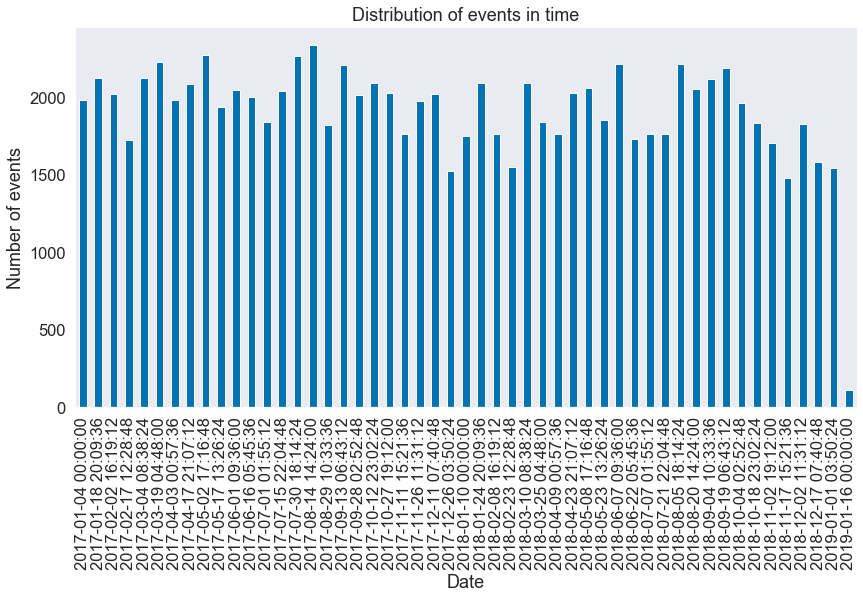

<Figure size 432x288 with 0 Axes>

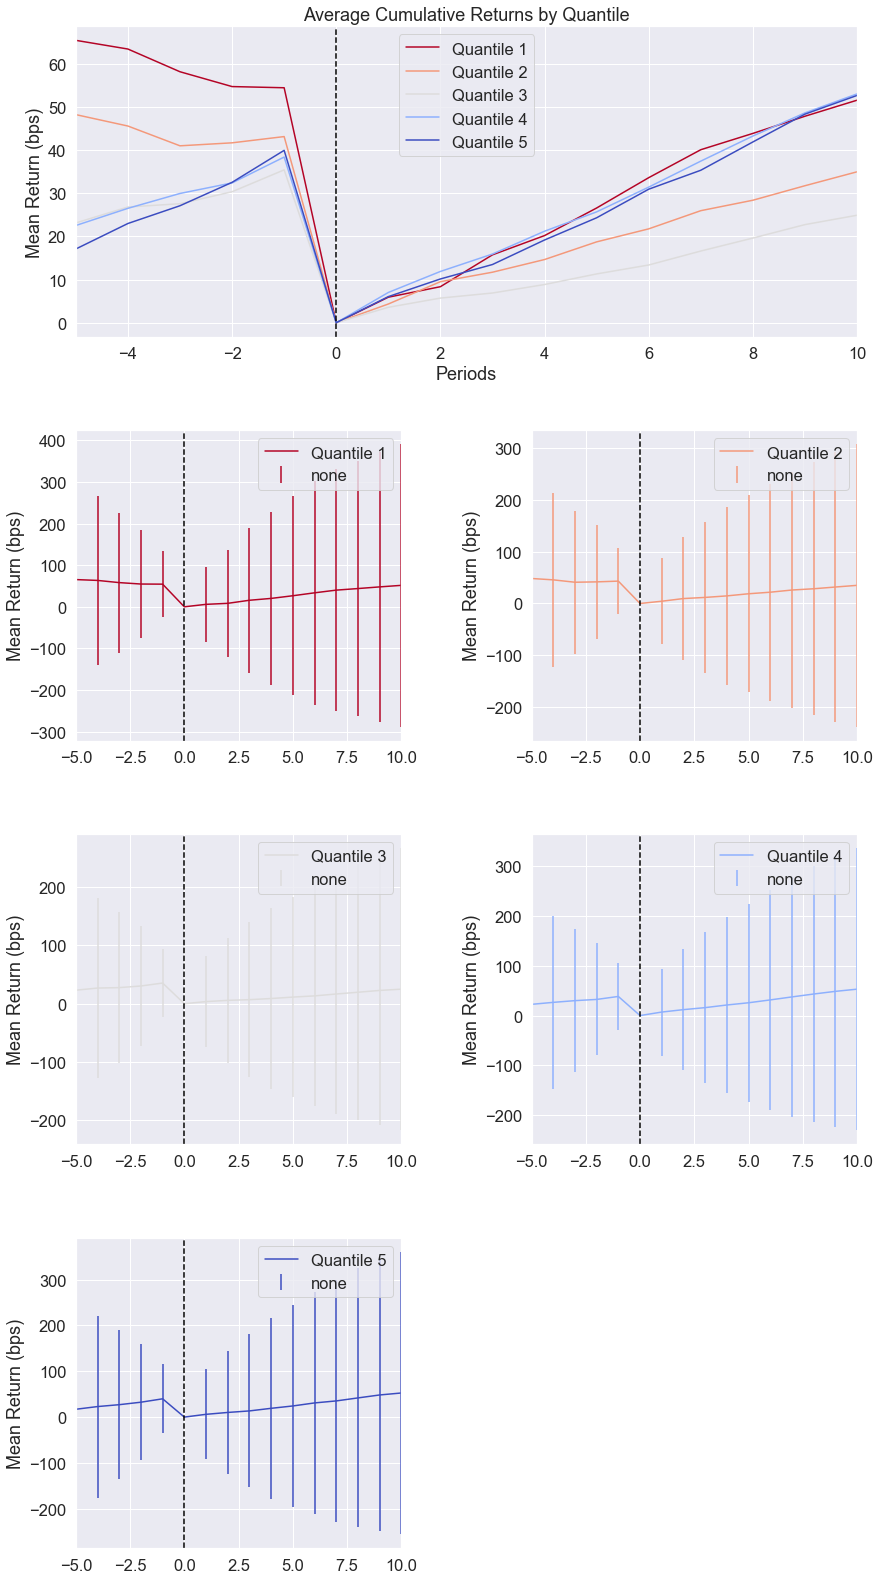

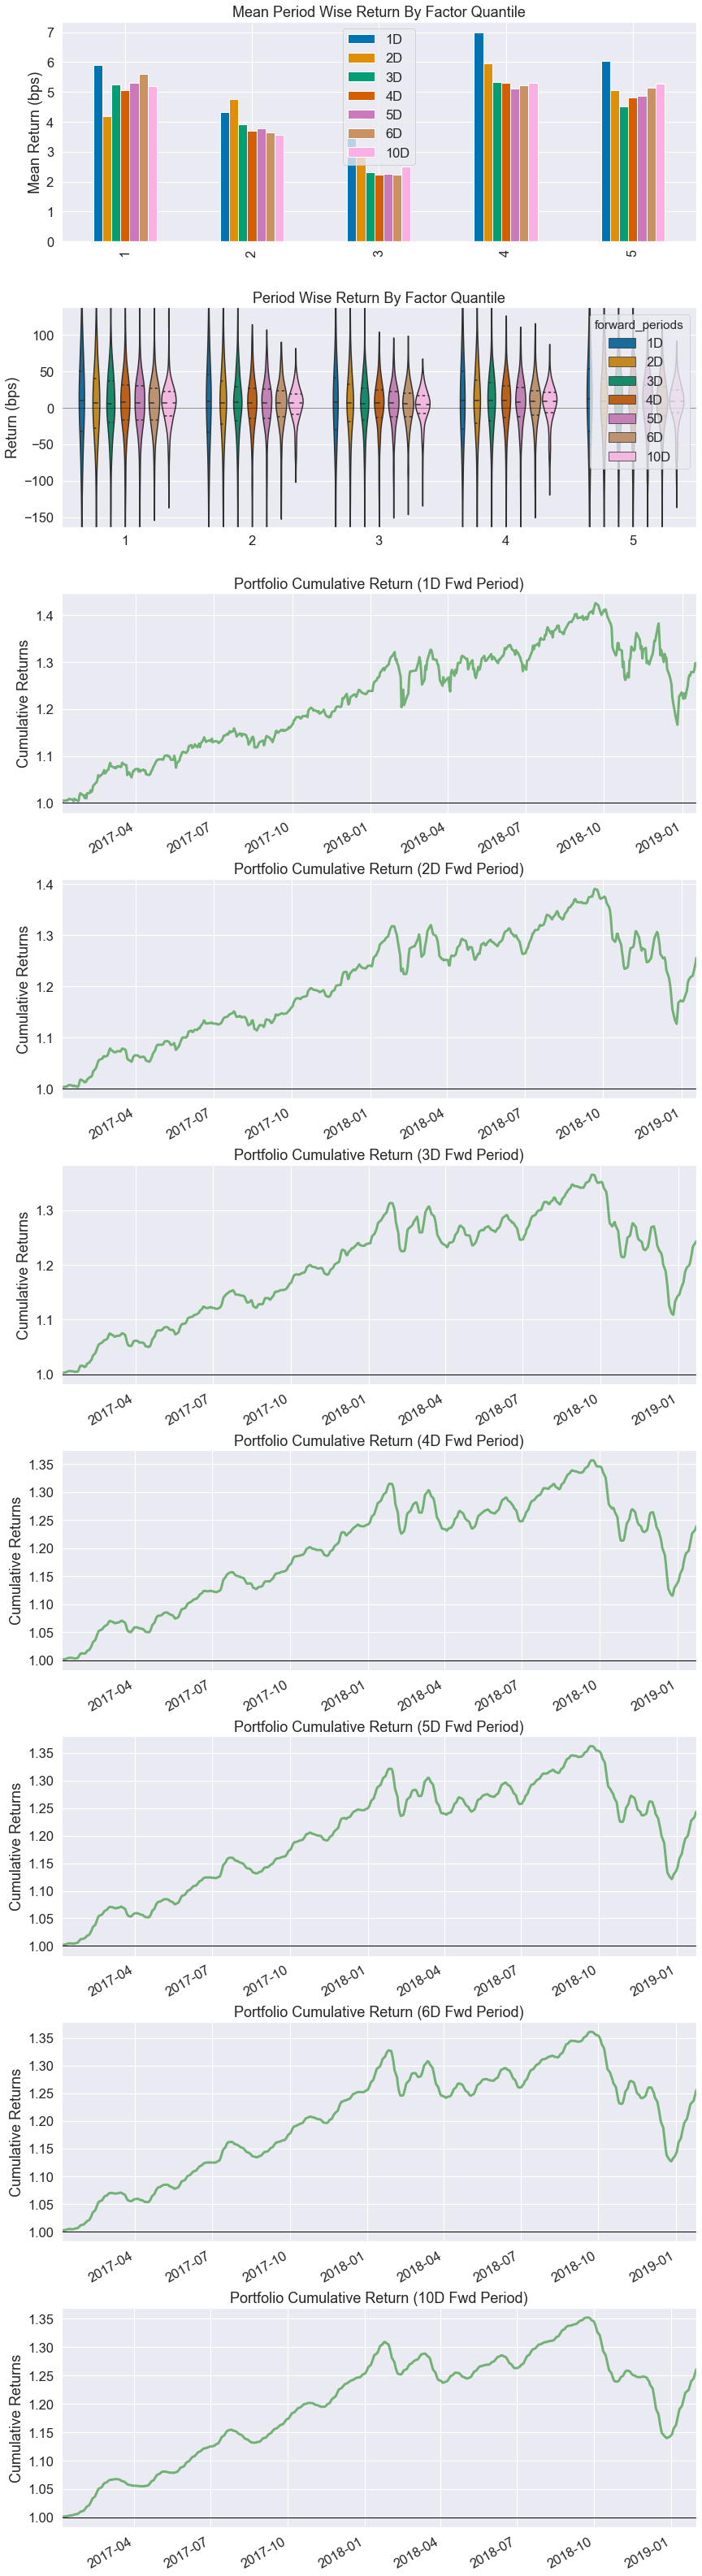

In [174]:
alphalens.tears.create_event_study_tear_sheet(factor_data, pricing, avgretplot=(5, 10))

Returns Analysis


1D     2D     3D     4D  \
Ann. alpha                                     0.002  0.011 -0.002  0.003   
beta                                           0.089  0.065  0.049  0.056   
Mean Period Wise Return Top Quantile (bps)     0.652  0.498  0.226  0.587   
Mean Period Wise Return Bottom Quantile (bps)  0.532 -0.381  0.968  0.815   
Mean Period Wise Spread (bps)                  0.120  0.875 -0.716 -0.194   

                                                  5D     6D    10D  
Ann. alpha                                     0.000  0.002  0.009  
beta                                           0.046  0.036  0.029  
Mean Period Wise Return Top Quantile (bps)     0.583  0.756  0.892  
Mean Period Wise Return Bottom Quantile (bps)  1.019  1.212  0.818  
Mean Period Wise Spread (bps)                 -0.387 -0.401  0.118

<Figure size 432x288 with 0 Axes>

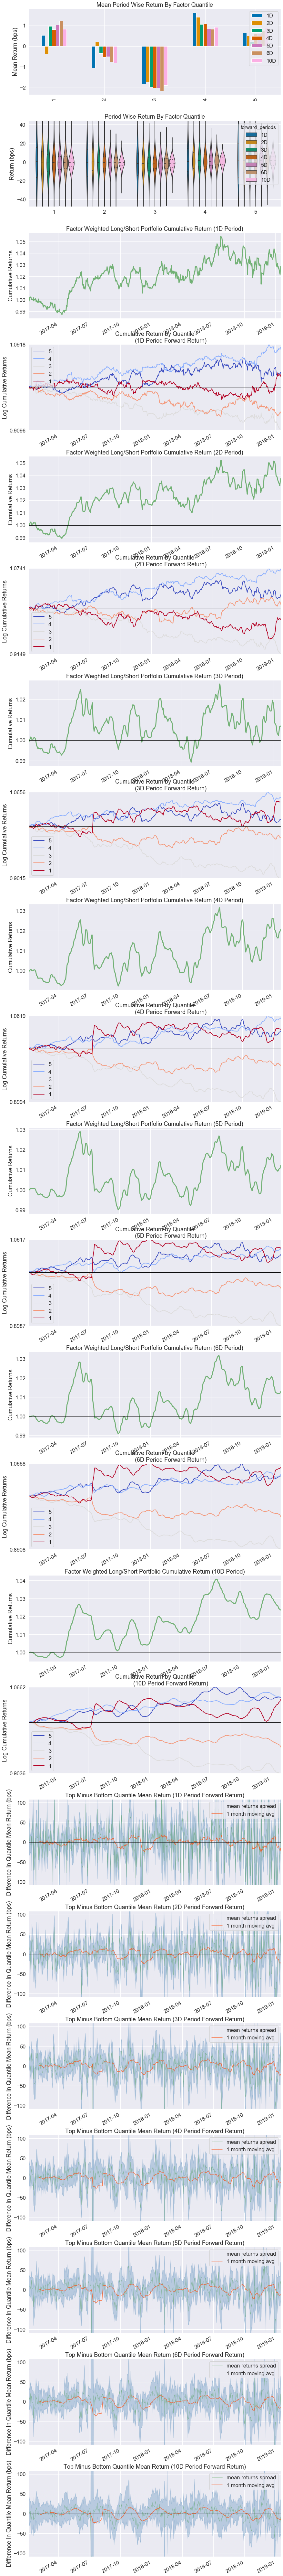

In [175]:
alphalens.tears.create_returns_tear_sheet(factor_data,long_short=True, group_neutral=False, by_group=False)

Information Analysis


1D     2D     3D     4D     5D     6D    10D
IC Mean           0.006  0.015  0.015  0.021  0.022  0.023  0.025
IC Std.           0.131  0.131  0.133  0.135  0.132  0.132  0.128
Risk-Adjusted IC  0.044  0.115  0.113  0.152  0.168  0.175  0.196
t-stat(IC)          NaN  2.599  2.553  3.435  3.795  3.958  4.438
p-value(IC)         NaN  0.010  0.011  0.001  0.000  0.000  0.000
IC Skew             NaN -0.180 -0.496 -0.386 -0.309 -0.318 -0.261
IC Kurtosis         NaN -0.300  0.340  0.429  0.135  0.117  0.111

<Figure size 432x288 with 0 Axes>

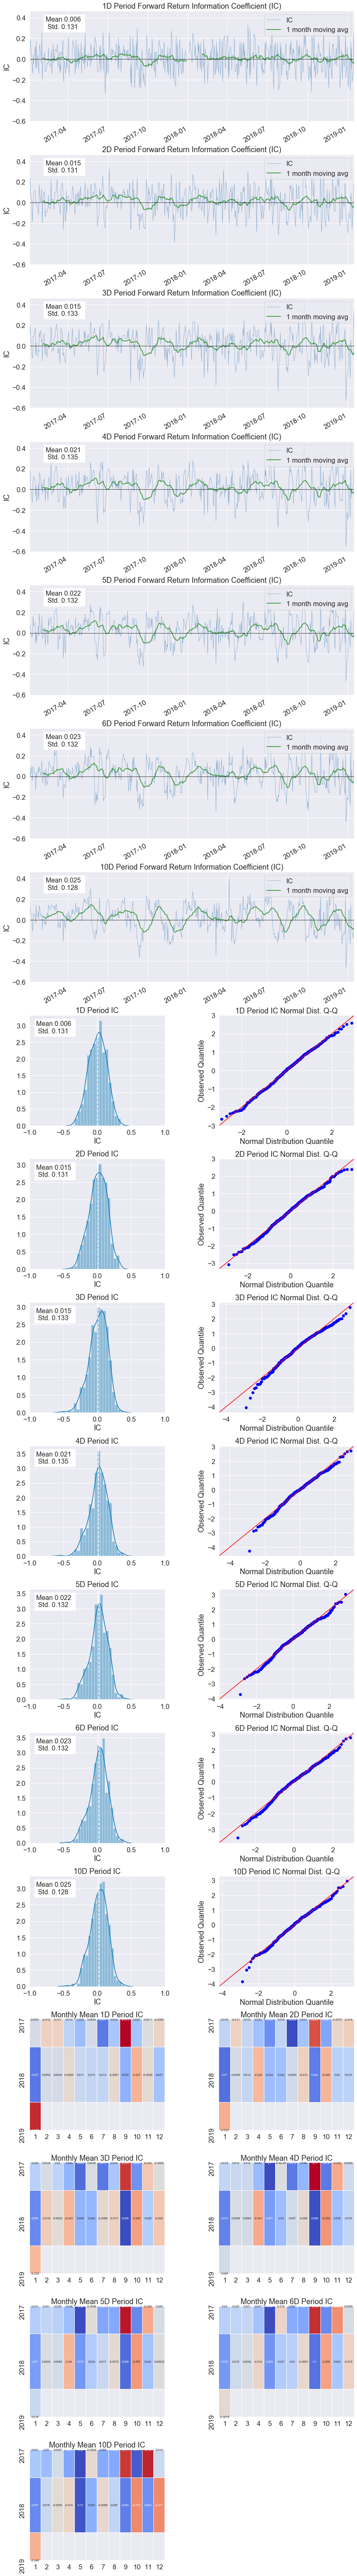

In [180]:
alphalens.tears.create_information_tear_sheet(factor_data, group_neutral=False, by_group=False)

Turnover Analysis


10D     1D     2D     3D     4D     5D     6D
Quantile 1 Mean Turnover   0.258  0.253  0.252  0.250  0.257  0.257  0.257
Quantile 2 Mean Turnover   0.307  0.283  0.293  0.291  0.301  0.305  0.303
Quantile 3 Mean Turnover   0.311  0.290  0.294  0.294  0.304  0.308  0.301
Quantile 4 Mean Turnover   0.313  0.298  0.297  0.302  0.309  0.306  0.302
Quantile 5 Mean Turnover   0.262  0.257  0.259  0.260  0.266  0.264  0.264

1D     2D     3D     4D     5D     6D  \
Mean Factor Rank Autocorrelation  0.998  0.998  0.998  0.997  0.997  0.997   

                                    10D  
Mean Factor Rank Autocorrelation  0.996

<Figure size 432x288 with 0 Axes>

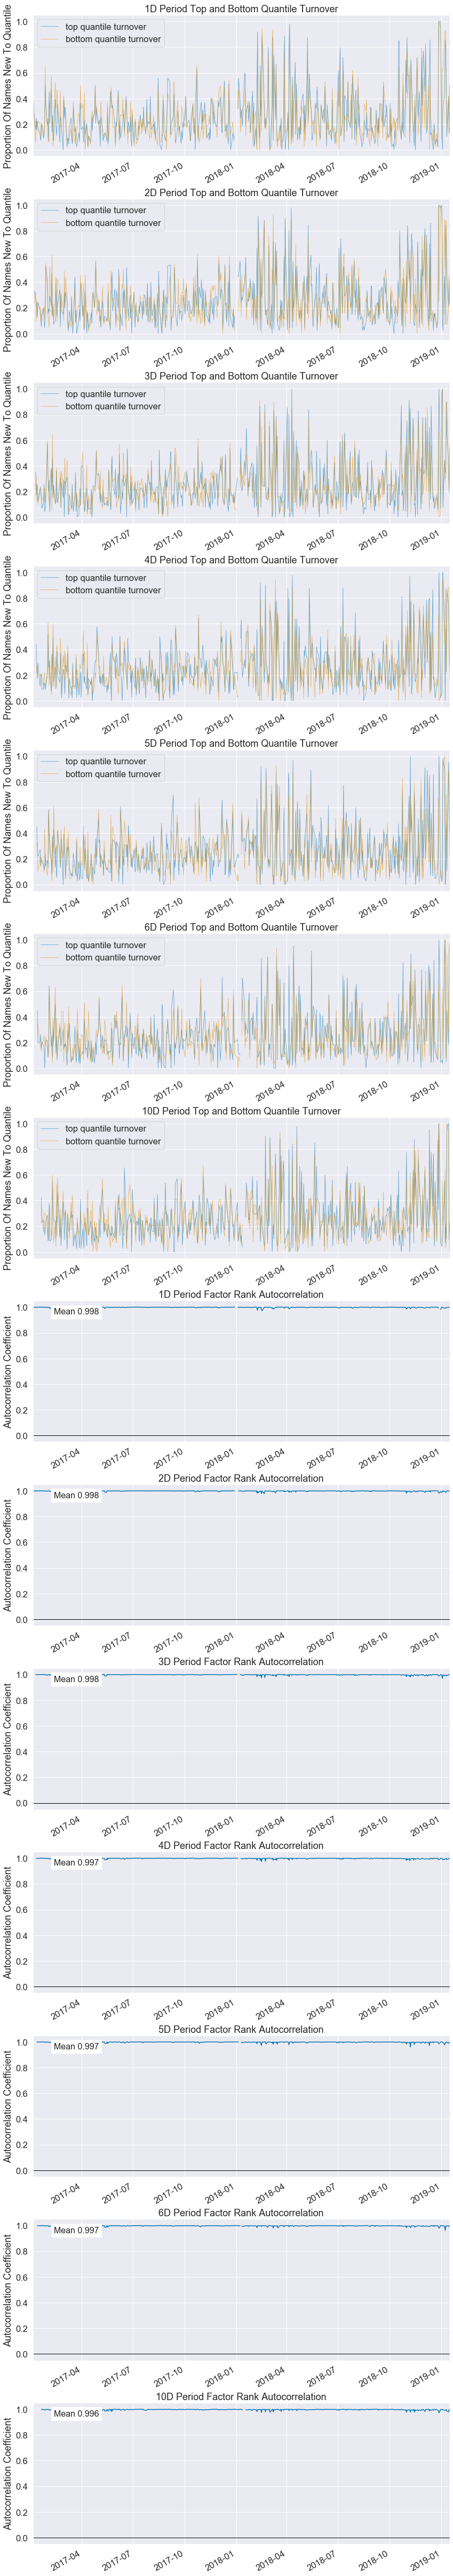

In [181]:
alphalens.tears.create_turnover_tear_sheet(factor_data)